# Last Week Review

We covered several aspects of plotting and visualization.

* **The use of colors, markers, and line styles**
* **The use of ticks, labels, and legends**
* **The use of annotation and drawings**
* **The creation of line and bar plots**
* **The creation of histograms and density plots**
* **The creation of scatter plots**
* **The creation of facet grids**


# Data Aggregation and Group Operations #

Categorizing a dataset and applying a function to each group, whether an aggregation or transformation, is often a critical component of a data analysis workflow. After loading, merging, and preparing a dataset, you may need to compute group statistics for reporting or visualization purposes. Pandas provides a flexible groupby interface, enabling you to slice, dice, and summarize datasets in a natural way.
<br>
<br>
**Aggregations** refer to any data transformation that produces scalar values from arrays. For example, you can aggregate data using mean, count, min, and sum.

In [1]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Define the path to the Superstore Excel file
pathSuperstore = r'Sample - Superstore.xlsx'

# Read the Excel file into a pandas DataFrame
superstoreData = pd.read_excel(pathSuperstore)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
# Display the first 2 rows of the superstoreData DataFrame to preview its structure and content
superstoreData.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,EmployeeID
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,5
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,1


In [3]:
# Display all column names in the superstoreData DataFrame to understand the available data fields
superstoreData.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'EmployeeID'],
      dtype='object')

In [4]:
# Generate descriptive statistics for the superstoreData DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
superstoreData.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2017-04-30 05:17:08.056834048,2017-05-04 04:17:20.304182528,55245.233297,229.858001,3.789574,0.156203,28.656896,4.873224
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000
25%,2499.250000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000
50%,4997.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500,5.000000
75%,7495.750000,2018-05-14 00:00:00,2018-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,7.000000
max,9994.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,9.000000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108,2.448598


In [5]:
# Check the data types of all columns in the superstoreData DataFrame
# This helps understand what type of data each column contains (e.g., numeric, string, datetime)
superstoreData.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
EmployeeID                int64
dtype: object

In [6]:
# Group the superstore data by State and EmployeeID, then calculate the sum of all numeric columns
# This creates a hierarchical index with State as the primary level and EmployeeID as the secondary level
# The numeric_only=True parameter ensures only numeric columns are summed
superstoreData.groupby([superstoreData['State'],superstoreData['EmployeeID']]).sum(numeric_only = True)

Row ID  Postal Code     Sales  Quantity  Discount  \
State     EmployeeID                                                      
Alabama   1            30249     254203.0  2112.020        17       0.0   
          2            24636     215932.0  1258.010        27       0.0   
          3            33033     253605.0   386.550        24       0.0   
          4            14713     107012.0  2580.830        13       0.0   
          5            30934     249097.0  3630.480        45       0.0   
...                      ...          ...       ...       ...       ...   
Wisconsin 6            62432     698256.0  4319.310        62       0.0   
          7            81998     967121.0  8597.000        75       0.0   
          8            67721     590660.0   530.700        31       0.0   
          9            25233     270627.0   533.000        21       0.0   
Wyoming   5             5870      82001.0  1603.136         4       0.2   

                         Profit  
State     EmployeeID             
Alabama   1            371.0940  
          2            383.2983  
          3             80.3025  
          4            856.7092  
          5            863.8775  
...                         ...  
Wisconsin 6           1191.3366  
          7           2216.5685  
          8            161.9653  
          9            193.5454  
Wyoming   5            100.1960  

[409 rows x 6 columns]

In [7]:
# Group the superstoreData DataFrame by the 'State' column
# Calculate the sum of all numeric columns for each state
# numeric_only=True ensures only numeric columns are considered in the sum operation
superstoreData.groupby(superstoreData['State']).sum(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
State,,,,,,,
Alabama,243876,2195669.0,19510.6400,256,0.00,5786.8253,308
Arizona,1019876,19102126.0,35282.0010,862,68.00,-3427.9246,1101
Arkansas,304575,4339309.0,11678.1300,240,0.00,4008.6871,288
California,10137449,184382639.0,457687.6315,7667,145.60,76381.3871,9703
Colorado,797002,14613828.0,32108.1180,693,57.60,-6527.8579,941
Connecticut,444411,531005.0,13384.3570,281,0.60,3511.4918,424
Delaware,504370,1896504.0,27451.0690,367,0.60,9977.3748,459
District of Columbia,17918,200160.0,2865.0200,40,0.00,1059.5893,40
Florida,1958255,12640225.0,89473.7080,1379,114.65,-3399.3017,1771


In [8]:
# Group the superstoreData DataFrame by the 'Region' column
# Calculate the sum of all numeric columns for each region
# numeric_only=True ensures only numeric columns are considered in the sum operation
superstoreData.groupby(superstoreData['Region']).sum(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
Region,,,,,,,
Central,11685963,151786150.0,501239.8908,8780,558.34,39706.3625,11359
East,14073919,50112210.0,678781.2400,10618,414.00,91522.7800,13974
South,8213295,55875052.0,391721.9050,6209,238.55,46749.4303,7685
West,15971838,293739752.0,725457.8245,12266,350.20,108418.4489,15685


In [9]:
# Access the 'Order Date' column from the superstoreData DataFrame
# This returns a Series object containing all values in the Order Date column
superstoreData['Order Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-01-21
9990   2018-02-26
9991   2018-02-26
9992   2018-02-26
9993   2018-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [10]:
# yearly data (= aggregation at the year level). Year is obtained from Order Date
superstoreData['Year'] = superstoreData['Order Date'].dt.year  # Extract the year from the Order Date column and create a new Year column
superstoreDataAGGYearly = superstoreData.groupby(superstoreData['Year'])  # Group the data by Year for aggregation operations# yearly data (= aggregation at the year level). Year is obtained from Order Date

In [11]:
# Generate descriptive statistics for the superstoreDataAGGYearly DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, and max values for each numeric column
superstoreDataAGGYearly.describe()

Row ID                                                       \
       count         mean   min      25%     50%      75%     max   
Year                                                                
2015  1993.0  4969.400401   6.0  2613.00  4899.0  7508.00  9990.0   
2016  2102.0  4954.184586   4.0  2381.25  4857.5  7625.75  9986.0   
2017  2587.0  4939.622729   1.0  2233.50  4988.0  7416.50  9987.0   
2018  3312.0  5087.107488  13.0  2655.75  5183.5  7498.25  9994.0   

                  Order Date                                 ...     Profit  \
              std      count                           mean  ...        max   
Year                                                         ...              
2015  2895.777922       1993  2015-08-11 11:47:21.344706560  ...  4630.4755   
2016  2894.466078       2102  2016-08-14 05:52:07.307326464  ...  3177.4750   
2017  2953.181324       2587  2017-08-08 01:31:50.630073600  ...  8399.9760   
2018  2817.482266       3312  2018-08-07 07:56:57.391304192  ...  6719.9808   

                 EmployeeID                                               
             std      count      mean  min  25%  50%  75%  max       std  
Year                                                                      
2015  198.931675     1993.0  4.890115  1.0  3.0  5.0  7.0  9.0  2.425903  
2016  185.051939     2102.0  4.931494  1.0  3.0  5.0  7.0  9.0  2.441328  
2017  280.780758     2587.0  4.836490  1.0  3.0  5.0  7.0  9.0  2.454051  
2018  241.864342     3312.0  4.854771  1.0  3.0  5.0  7.0  9.0  2.462840  

[4 rows x 72 columns]

In [12]:
# monthly data (= aggregation at the month level). Month is obtained from Order Date
# Convert the 'Order Date' column to a Period object representing months
superstoreData['Month'] = superstoreData['Order Date'].dt.to_period('M')

# Group the data by month to prepare for aggregation operations
# Note: This creates a GroupBy object but doesn't perform aggregation yet
superstoreDataAGGMonthly = superstoreData.groupby(superstoreData['Month'])# monthly data (= aggregation at the month level). Month is obtained from Order Date

In [13]:
# Generate descriptive statistics for the superstoreDataAGGMonthly DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, and max for each numeric column
superstoreDataAGGMonthly.describe()

Row ID                                                        \
         count         mean    min      25%     50%      75%     max   
Month                                                                  
2015-01   79.0  4381.974684  593.0  1124.50  4939.0  6432.00  9990.0   
2015-02   46.0  5918.152174  457.0  1999.25  6306.0  9226.00  9764.0   
2015-03  157.0  5551.433121  158.0  2701.00  6152.0  7948.00  9947.0   
2015-04  135.0  5115.740741  341.0  3279.50  5005.0  7197.50  9912.0   
2015-05  122.0  5014.000000   18.0  1948.50  4926.5  7857.75  9833.0   
2015-06  135.0  3642.918519    6.0   917.50  2999.0  5151.50  9897.0   
2015-07  143.0  5219.601399  338.0  2858.00  5687.0  7823.00  9934.0   
2015-08  153.0  4766.673203   19.0  1839.00  5072.0  7823.00  9883.0   
2015-09  268.0  4846.044776  126.0  2673.75  4807.0  7599.25  9896.0   
2015-10  159.0  5444.371069   47.0  3228.50  5593.0  7619.50  9636.0   
2015-11  318.0  5049.849057   17.0  3203.25  4833.5  7132.50  9959.0   
2015-12  278.0  4942.269784   68.0  3130.25  4693.5  7359.75  9944.0   
2016-01   58.0  5015.431034   93.0  2488.25  5133.5  7719.50  9801.0   
2016-02   64.0  4799.140625  212.0  2250.75  4540.5  7500.25  9085.0   
2016-03  138.0  5040.007246  118.0  2276.50  5087.5  6923.75  9963.0   
2016-04  160.0  4834.131250   50.0  2292.75  5179.5  7492.25  9945.0   
2016-05  146.0  5571.294521  154.0  3992.25  5586.0  8102.75  9986.0   
2016-06  138.0  5574.637681  340.0  3124.25  5109.5  8077.75  9972.0   
2016-07  140.0  4175.771429  272.0  2050.75  3684.5  5928.50  9964.0   
2016-08  159.0  5198.327044  226.0  2548.50  5100.0  7975.50  9889.0   
2016-09  293.0  4954.996587   25.0  2327.00  5058.0  7803.00  9981.0   
2016-10  166.0  4714.692771    4.0  2109.25  4675.0  7256.25  9914.0   
2016-11  324.0  5061.206790   15.0  2371.25  5340.5  7673.25  9933.0   
2016-12  316.0  4678.920886   38.0  2305.50  4459.0  6938.00  9956.0   
2017-01   89.0  5370.471910   26.0  2880.00  5752.0  7810.00  9495.0   
2017-02   83.0  5164.614458  721.0  1821.50  5405.0  8166.50  9723.0   
2017-03  163.0  5003.104294   45.0  2806.50  4400.0  7648.50  9921.0   
2017-04  170.0  4154.941176   89.0  1184.50  3987.5  7109.75  9936.0   
2017-05  225.0  4894.795556  161.0  2182.00  4724.0  7605.00  9854.0   
2017-06  199.0  4642.618090    3.0  1308.50  4704.0  7638.50  9938.0   
2017-07  201.0  4880.492537   43.0  2071.00  4823.0  7075.00  9895.0   
2017-08  176.0  4954.505682  100.0  2857.75  5072.5  7704.25  9880.0   
2017-09  363.0  5207.617080   71.0  2826.50  5399.0  7384.50  9987.0   
2017-10  196.0  5015.239796  134.0  2176.75  5871.0  7666.25  9836.0   
2017-11  370.0  4812.451351    1.0  2368.25  4812.5  7128.75  9815.0   
2017-12  352.0  5165.289773   14.0  2935.75  5534.0  7566.25  9980.0   
2018-01  155.0  5466.922581  440.0  2392.00  6357.0  8270.50  9918.0   
2018-02  107.0  5546.766355  131.0  3117.00  6027.0  7491.00  9993.0   
2018-03  238.0  5436.945378  360.0  3011.00  5565.5  7906.75  9890.0   
2018-04  203.0  4670.004926   13.0  2474.50  4639.0  6861.50  9879.0   
2018-05  242.0  5565.752066   86.0  3847.25  5821.5  7412.75  9994.0   
2018-06  245.0  4782.371429   98.0  2259.00  4710.0  7265.00  9952.0   
2018-07  226.0  5237.615044   24.0  3119.00  5501.5  7501.75  9830.0   
2018-08  218.0  5234.426606  378.0  2866.25  5239.0  7765.75  9982.0   
2018-09  459.0  5138.204793   42.0  2835.50  5460.0  7062.50  9961.0   
2018-10  298.0  4741.120805   35.0  2417.25  4258.5  7277.50  9960.0   
2018-11  459.0  5011.145969   85.0  2726.50  4774.0  7758.50  9989.0   
2018-12  462.0  4871.891775   76.0  2349.25  4922.5  7520.75  9970.0   

                     Order Date                                 ...  \
                 std      count                           mean  ...   
Month                                                           ...   
2015-01  2914.175848         79  2015-01-16 13:22:01.518987264  ...   
2015-02  3307.493922         46  2015-02-12 05:13:0

In [14]:
# daily data (= aggregation at the day level). Day is obtained from Order Date
# Extract the day component from the 'Order Date' column and create a new 'Day' column
# The to_period('D') function converts datetime to a period representing the day
superstoreData['Day'] = superstoreData['Order Date'].dt.to_period('D')


# Group the data by the newly created 'Day' column
# This creates a GroupBy object that can be used for aggregation operations
superstoreDataAGGDaily = superstoreData.groupby(superstoreData['Day'])

In [15]:
# Generate descriptive statistics for the superstoreDataAGGDaily DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, and max values for each numeric column
superstoreDataAGGDaily.describe()

Row ID                                                         \
            count         mean     min      25%     50%      75%     max   
Day                                                                        
2015-01-03    1.0  7981.000000  7981.0  7981.00  7981.0  7981.00  7981.0   
2015-01-04    3.0   741.000000   740.0   740.50   741.0   741.50   742.0   
2015-01-05    1.0  1760.000000  1760.0  1760.00  1760.0  1760.00  1760.0   
2015-01-06    9.0  7206.111111  5328.0  7475.00  7477.0  7479.00  7481.0   
2015-01-07    2.0  7661.500000  7661.0  7661.25  7661.5  7661.75  7662.0   
...           ...          ...     ...      ...     ...      ...     ...   
2018-12-26    4.0  4607.250000  1009.0  3091.75  4630.5  6146.00  8159.0   
2018-12-27    2.0  2570.500000  2570.0  2570.25  2570.5  2570.75  2571.0   
2018-12-28   19.0  4309.473684   271.0   764.00  6090.0  6821.50  8099.0   
2018-12-29   12.0  5424.500000  1878.0  3898.75  5457.5  7634.25  7637.0   
2018-12-30    7.0  1579.571429   646.0   907.50   909.0  1297.50  5092.0   

                        Order Date                       ... EmployeeID  \
                    std      count                 mean  ...        max   
Day                                                      ...              
2015-01-03          NaN          1  2015-01-03 00:00:00  ...        9.0   
2015-01-04     1.000000          3  2015-01-04 00:00:00  ...        3.0   
2015-01-05          NaN          1  2015-01-05 00:00:00  ...        8.0   
2015-01-06   711.110477          9  2015-01-06 00:00:00  ...        8.0   
2015-01-07     0.707107          2  2015-01-07 00:00:00  ...        3.0   
...                 ...        ...                  ...  ...        ...   
2018-12-26  2999.431766          4  2018-12-26 00:00:00  ...        8.0   
2018-12-27     0.707107          2  2018-12-27 00:00:00  ...        8.0   
2018-12-28  3152.360551         19  2018-12-28 00:00:00  ...        9.0   
2018-12-29  2287.724534         12  2018-12-29 00:00:00  ...        9.0   
2018-12-30  1566.358075          7  2018-12-30 00:00:00  ...        8.0   

                      Year                                                  \
                 std count    mean     min     25%     50%     75%     max   
Day                                                                          
2015-01-03       NaN   1.0  2015.0  2015.0  2015.0  2015.0  2015.0  2015.0   
2015-01-04  1.000000   3.0  2015.0  2015.0  2015.0  2015.0  2015.0  2015.0   
2015-01-05       NaN   1.0  2015.0  2015.0  2015.0  2015.0  2015.0  2015.0   
2015-01-06  2.368778   9.0  2015.0  2015.0  2015.0  2015.0  2015.0  2015.0   
2015-01-07  0.000000   2.0  2015.0  2015.0  2015.0  2015.0  2015.0  2015.0   
...              ...   ...     ...     ...     ...     ...     ...     ...   
2018-12-26  1.500000   4.0  2018.0  2018.0  2018.0  2018.0  2018.0  2018.0   
2018-12-27  4.949747   2.0  2018.0  2018.0  2018.0  2018.0  2018.0  2018.0   
2018-12-28  2.040525  19.0  2018.0  2018.0  2018.0  2018.0  2018.0  2018.0   
2018-12-29  2.081666  12.0  2018.0  2018.0  2018.0  2018.0  2018.0  2018.0   
2018-12-30  2.299068   7.0  2018.0  2018.0  2018.0  2018.0  2018.0  2018.0   

                 
            std  
Day              
2015-01-03  NaN  
2015-01-04  0.0  
2015-01-05  NaN  
2015-01-06  0.0  
2015-01-07  0.0  
...         ...  
2018-12-26  0.0  
2018-12-27  0.0  
2018-12-28  0.0  
2018-12-29  0.0  
2018-12-30  0.0  

[1236 rows x 80 columns]

## Pre-defined aggregation ##

### Without agg() function ###

In [16]:
# Calculate the sum of all numeric columns in the superstoreDataAGGYearly DataFrame
# The numeric_only=True parameter ensures only numeric columns are included in the calculation
# Other available aggregation methods include: min(), max(), count(), mean(), median(), std(), var(), prod(), first(), last(), quantile()
superstoreDataAGGYearly.sum(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
Year,,,,,,,
2015,9904015,113271247.0,484247.4981,7581,315.46,49543.9741,9746
2016,10413696,111197431.0,470532.5090,7979,327.09,61618.6037,10366
2017,12778804,140981788.0,609205.5980,9837,400.32,81795.1743,12512
2018,16848500,186062698.0,733215.2552,12476,518.22,93439.2696,16079


In [17]:
# Calculate the sum of all numeric columns in the superstoreDataAGGMonthly DataFrame
# The numeric_only=True parameter ensures only numeric columns are included in the calculation
superstoreDataAGGMonthly.sum(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID,Year
Month,,,,,,,,
2015-01,346176,4342297.0,14236.8950,284,10.00,2450.1907,367,159185
2015-02,272235,3049775.0,4519.8920,159,8.10,862.3084,227,92690
2015-03,871575,8314538.0,55691.0090,585,26.30,498.7299,773,316355
2015-04,690625,7723827.0,28295.3450,536,14.85,3488.8352,662,272025
2015-05,611708,6497804.0,23648.2870,466,18.95,2738.7096,632,245830
2015-06,491794,6827435.0,34595.1276,521,23.22,4976.5244,667,272025
2015-07,746403,9046189.0,33946.3930,550,24.55,-841.4826,699,288145
2015-08,729301,8628386.0,27909.4685,609,20.05,5318.1050,708,308295
2015-09,1298740,14521813.0,81777.3508,1000,42.87,8328.0994,1291,540020


In [18]:
# Calculate the sum of 'Sales' and 'Profit' columns from the yearly aggregated superstore data
# numeric_only=True ensures only numeric columns are considered in the sum operation
# The outer [] selects only the 'Sales' and 'Profit' columns from the resulting sum
superstoreDataAGGYearly.sum(numeric_only = True)[['Sales','Profit']]

,Sales,Profit
Year,,
2015,484247.4981,49543.9741
2016,470532.5090,61618.6037
2017,609205.5980,81795.1743
2018,733215.2552,93439.2696


In [19]:
# Calculate the sum of 'Sales' and 'Profit' columns in the superstoreDataAGGYearly DataFrame
# The numeric_only=True parameter ensures only numeric columns are considered in the sum operation
superstoreDataAGGYearly[['Sales','Profit']].sum(numeric_only = True)

,Sales,Profit
Year,,
2015,484247.4981,49543.9741
2016,470532.5090,61618.6037
2017,609205.5980,81795.1743
2018,733215.2552,93439.2696


In [20]:
# Import NumPy library for numerical operations
import numpy as np

# Extract column names of numeric columns from superstoreDataAGGYearly DataFrame
# 1. superstoreDataAGGYearly.mean(numeric_only = True) - Calculate mean of numeric columns only
# 2. .index - Get the index (column names) of the resulting Series
# 3. np.array() - Convert the index object to a NumPy array
np.array(superstoreDataAGGYearly.mean(numeric_only = True).index)

array([2015, 2016, 2017, 2018], dtype=int32)

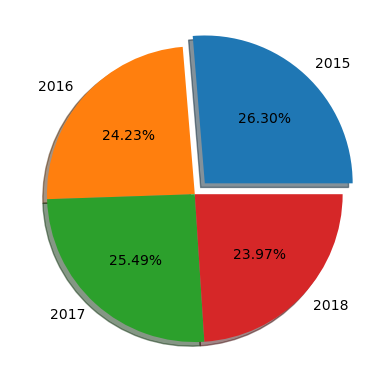

In [21]:
# Creating a Pie Chart illustrating the average sales per year
## The pie chart has 4 slices representing the 4 years
## The average sales corresponds to the size the slices

import matplotlib.pyplot as plt

%matplotlib inline

# Calculate the mean sales value for each year
y = superstoreDataAGGYearly.mean(numeric_only = True).Sales # Average Sales
# Extract the year labels from the index of the aggregated data
labels = np.array(superstoreDataAGGYearly.mean(numeric_only = True).index)

# Create pie chart with:
# - y: values for each slice (average sales)
# - labels: year labels for each slice
# - autopct: format to display percentage values on slices
# - shadow: add shadow effect to the pie chart
# - explode: offset the first slice (first year) from the center for emphasis
plt.pie(y, labels=labels, autopct='%1.2f%%', shadow=True, explode=[0.1,0,0,0])
plt.show() # Display the pie chart

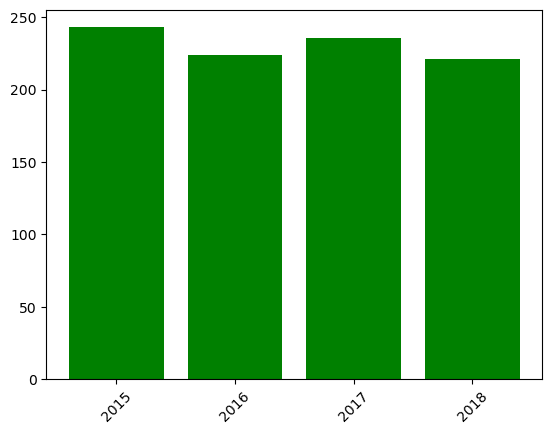

In [22]:
# Plotting average sales per year using a bar plot
import matplotlib.pyplot as plt

%matplotlib inline
# Convert year labels to numeric indices for x-axis positioning
x = pd.factorize(superstoreDataAGGYearly.mean(numeric_only = True).index)[0]
# Extract the average sales values for each year
y = superstoreDataAGGYearly.mean(numeric_only = True).Sales # Sales
# Get the year labels for x-axis ticks
labels = np.array(superstoreDataAGGYearly.mean(numeric_only = True).index)
# Set the x-axis tick positions and labels, rotating them 45 degrees for better readability
plt.xticks(x, labels, rotation=45)
# Create a bar chart with green bars showing average sales per year
plt.bar(x, y, color='green') # bar charts
# Display the plot
plt.show()

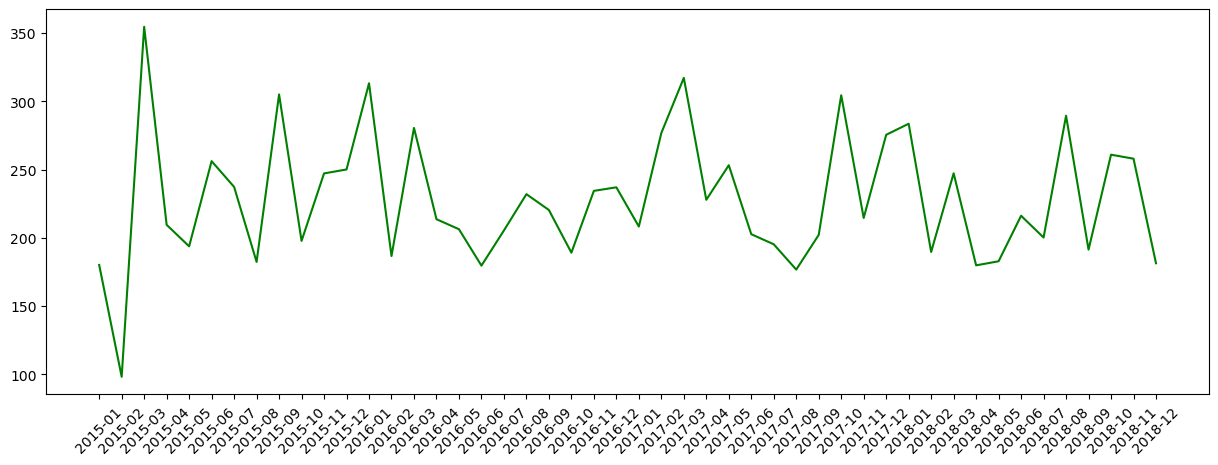

In [23]:
# Plotting trend in average sales per month

import matplotlib.pyplot as plt

%matplotlib inline
# Convert month names to numeric indices for x-axis positioning
x = pd.factorize(superstoreDataAGGMonthly.mean(numeric_only = True).index)[0]

# Extract the average sales values for each month
y = superstoreDataAGGMonthly.mean(numeric_only = True).Sales # Sales

# Get the month names for x-axis labels
labels = np.array(superstoreDataAGGMonthly.mean(numeric_only = True).index)

plt.figure(figsize=(15, 5)) # setting a size for the figure to show all the values (15 for width, 5 for height)

# Set x-axis ticks with month labels and rotate them 45 degrees for better readability
plt.xticks(x,labels, rotation=45)

# Plot the sales trend line in green color
plt.plot(x, y, color='green') # line

# Display the plot
plt.show()

### With agg() function ###

In [24]:
# Calculate the mean of all numeric columns in the superstoreDataAGGYearly DataFrame
# The numeric_only=True parameter ensures only numeric columns are considered in the calculation
superstoreDataAGGYearly.mean(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
Year,,,,,,,
2015,4969.400401,56834.544405,242.974159,3.803813,0.158284,24.858994,4.890115
2016,4954.184586,52951.157619,223.849909,3.795909,0.155609,29.314274,4.931494
2017,4939.622729,54580.638018,235.487282,3.802474,0.154743,31.617771,4.836490
2018,5087.107488,56263.289386,221.381418,3.766908,0.156467,28.212340,4.854771


In [25]:
# Import NumPy library, a fundamental package for scientific computing in Python
# It provides support for arrays, matrices, and many mathematical functions
import numpy as np

In [26]:
# Calculate the mean of all numeric columns in the superstoreDataAGGYearly DataFrame
# The numeric_only=True parameter ensures only numeric columns are considered
# Other available aggregation methods include: min, max, count, sum, median, std, var, prod, first, last
superstoreDataAGGYearly.mean(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
Year,,,,,,,
2015,4969.400401,56834.544405,242.974159,3.803813,0.158284,24.858994,4.890115
2016,4954.184586,52951.157619,223.849909,3.795909,0.155609,29.314274,4.931494
2017,4939.622729,54580.638018,235.487282,3.802474,0.154743,31.617771,4.836490
2018,5087.107488,56263.289386,221.381418,3.766908,0.156467,28.212340,4.854771


In [27]:
# Aggregate data by:
# - Counting unique EmployeeIDs
# - Summing all Sales values
# - Calculating the mean (average) Profit
superstoreDataAGGYearly.agg({'EmployeeID' : ['count'], 'Sales' : ['sum'],'Profit':['mean']})

,EmployeeID,Sales,Profit
,count,sum,mean
Year,,,
2015,1993,484247.4981,24.858994
2016,2102,470532.5090,29.314274
2017,2587,609205.5980,31.617771
2018,3312,733215.2552,28.212340


In [28]:
# Calculate the mean (average) of 'Sales' and 'Profit' columns from the superstoreDataAGGYearly DataFrame
# This aggregation returns a Series with the mean value for each column
superstoreDataAGGYearly[['Sales','Profit']].agg('mean')

,Sales,Profit
Year,,
2015,242.974159,24.858994
2016,223.849909,29.314274
2017,235.487282,31.617771
2018,221.381418,28.212340


In [29]:
# Aggregate statistics for 'Sales' and 'Profit' columns in the superstoreDataAGGYearly DataFrame
# This calculates count, mean, standard deviation, minimum and maximum values for both columns
superstoreDataAGGYearly[['Sales','Profit']].agg(['count','mean','std','min','max'])

Sales                                          Profit             \
     count        mean         std    min       max  count       mean   
Year                                                                    
2015  1993  242.974159  754.053357  0.852  22638.48   1993  24.858994   
2016  2102  223.849909  467.634488  0.984   6354.95   2102  29.314274   
2017  2587  235.487282  668.217524  0.836  17499.95   2587  31.617771   
2018  3312  221.381418  585.257531  0.444  13999.96   3312  28.212340   

                                        
             std        min        max  
Year                                    
2015  198.931675 -3701.8928  4630.4755  
2016  185.051939 -2639.9912  3177.4750  
2017  280.780758 -6599.9780  8399.9760  
2018  241.864342 -3839.9904  6719.9808

## User-defined aggregation ##

In [30]:
def top(df, column, n=5):
    """
    Returns the top n rows of a dataframe sorted by a specified column.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to sort
    column : str
        The column name to sort by
    n : int, default=5
        Number of top rows to return
    
    Returns:
    --------
    pandas.DataFrame
        The top n rows sorted by the specified column
    """
    return df.sort_values(by=column)[-n:]

In [31]:
# Apply the 'top' function to each group in superstoreDataAGGYearly
# This returns the top 5 rows based on the 'Sales' column for each group
# The 'apply' method executes the 'top' function on each group created by the groupby operation
# Parameters:
#   - column='Sales': Specifies that rows should be sorted by the 'Sales' column
#   - n=5: Limits the result to the top 5 rows per group
superstoreDataAGGYearly.apply(top, column='Sales', n=5) 

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
Year                                                                      
2015 6626    6627  CA-2015-145541 2015-12-14 2015-12-21  Standard Class   
     165      166  CA-2015-139892 2015-09-08 2015-09-12  Standard Class   
     2505    2506  CA-2015-143917 2015-07-25 2015-07-27    Second Class   
     4098    4099  CA-2015-116904 2015-09-23 2015-09-28  Standard Class   
     2697    2698  CA-2015-145317 2015-03-18 2015-03-23  Standard Class   
2016 9639    9640  CA-2016-116638 2016-01-28 2016-01-31    Second Class   
     9741    9742  CA-2016-117086 2016-11-08 2016-11-12  Standard Class   
     8204    8205  CA-2016-114811 2016-11-08 2016-11-08        Same Day   
     8990    8991  US-2016-128587 2016-12-24 2016-12-30  Standard Class   
     509      510  CA-2016-145352 2016-03-16 2016-03-22  Standard Class   
2017 6425    6426  CA-2017-143714 2017-05-23 2017-05-27  Standard Class   
     8488    8489  CA-2017-158841 2017-02-02 2017-02-04    Second Class   
     4277    4278  US-2017-107440 2017-04-16 2017-04-20  Standard Class   
     9039    9040  CA-2017-117121 2017-12-17 2017-12-21  Standard Class   
     6826    6827  CA-2017-118689 2017-10-02 2017-10-09  Standard Class   
2018 6520    6521  CA-2018-138289 2018-01-16 2018-01-18    Second Class   
     683      684  US-2018-168116 2018-11-04 2018-11-04        Same Day   
     4190    4191  CA-2018-166709 2018-11-17 2018-11-22  Standard Class   
     2623    2624  CA-2018-127180 2018-10-22 2018-10-24     First Class   
     8153    8154  CA-2018-140151 2018-03-23 2018-03-25     First Class   

          Customer ID         Customer Name      Segment        Country  \
Year                                                                      
2015 6626    TB-21400      Tom Boeckenhauer     Consumer  United States   
     165     BM-11140          Becky Martin     Consumer  United States   
     2505    KL-16645          Ken Lonsdale     Consumer  United States   
     4098    SC-20095          Sanjit Chand     Consumer  United States   
     2697    SM-20320           Sean Miller  Home Office  United States   
2016 9639    JH-15985           Joseph Holt     Consumer  United States   
     9741    QJ-19255          Quincy Jones    Corporate  United States   
     8204    KD-16495         Keith Dawkins    Corporate  United States   
     8990    HM-14860           Harry Marie    Corporate  United States   
     509     CM-12385  Christopher Martinez     Consumer  United States   
2017 6425    CC-12370    Christopher Conant     Consumer  United States   
     8488    SE-20110          Sanjit Engle     Consumer  United States   
     4277    BS-11365          Bill Shonely    Corporate  United States   
     9039    AB-10105         Adrian Barton     Consumer  United States   
     6826    TC-20980          Tamara Chand    Corporate  United States   
2018 6520    AR-10540           Andy Reiter     Consumer  United States   
     683     GT-14635        Grant Thornton    Corporate  United States   
     4190    HL-15040          Hunter Lopez     Consumer  United States   
     2623    TA-21385          Tom Ashbrook  Home Office  United States   
     8153    RB-19360          Raymond Buch     Consumer  United States   

                    City  ... Sub-Category  \
Year                      ...                
2015 6626  New York City  ...     Machines   
     165     San Antonio  ...     Machines   
     2505  San Francisco  ...     Supplies   
     4098    Minneapolis  ...      Binders   
     2697   Jacksonville  ...     Machines   
2016 9639        Concord  ...       Tables   
     9741     Burlington  ...    Bookcases   
     8204  New York City  ...     Machines   
     8990    Springfield  ...      Copiers   
     509         Atlanta  ...      Binders   
2017 6425   Philadelphia  ...      Copiers   
     8488      Arlington  ...     Machines   
     4277       Lakewood  ...     Machines   
     9039        De

In [32]:
# Return the top 5 orders in 2016 based on the total sales

import numpy as np

# Apply the 'top' function to get the top orders based on Sales column, limiting to 5 results
top_df = superstoreDataAGGYearly.apply(top, column='Sales', n=5)

# Filter the top orders to only include those from the year 2016
top_df_2016 = top_df[top_df['Order Date'].dt.year == 2016]

# Display the filtered dataframe containing the top 5 orders from 2016
top_df_2016


Row ID        Order ID Order Date  Ship Date       Ship Mode  \
Year                                                                      
2016 9639    9640  CA-2016-116638 2016-01-28 2016-01-31    Second Class   
     9741    9742  CA-2016-117086 2016-11-08 2016-11-12  Standard Class   
     8204    8205  CA-2016-114811 2016-11-08 2016-11-08        Same Day   
     8990    8991  US-2016-128587 2016-12-24 2016-12-30  Standard Class   
     509      510  CA-2016-145352 2016-03-16 2016-03-22  Standard Class   

          Customer ID         Customer Name    Segment        Country  \
Year                                                                    
2016 9639    JH-15985           Joseph Holt   Consumer  United States   
     9741    QJ-19255          Quincy Jones  Corporate  United States   
     8204    KD-16495         Keith Dawkins  Corporate  United States   
     8990    HM-14860           Harry Marie  Corporate  United States   
     509     CM-12385  Christopher Martinez   Consumer  United States   

                    City  ... Sub-Category  \
Year                      ...                
2016 9639        Concord  ...       Tables   
     9741     Burlington  ...    Bookcases   
     8204  New York City  ...     Machines   
     8990    Springfield  ...      Copiers   
     509         Atlanta  ...      Binders   

                                                Product Name     Sales  \
Year                                                                     
2016 9639  Chromcraft Bull-Nose Wood Oval Conference Tabl...  4297.644   
     9741  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.900   
     8204                  Zebra ZM400 Thermal Label Printer  4643.800   
     8990                 Canon PC1060 Personal Laser Copier  4899.930   
     509   Fellowes PB500 Electric Punch Plastic Comb Bin...  6354.950   

          Quantity Discount     Profit EmployeeID  Year    Month         Day  
Year                                                                          
2016 9639       13      0.4 -1862.3124          3  2016  2016-01  2016-01-28  
     9741        5      0.0  1013.1270          8  2016  2016-11  2016-11-08  
     8204        4      0.0  2229.0240          9  2016  2016-11  2016-11-08  
     8990        7      0.0  2302.9671          4  2016  2016-12  2016-12-24  
     509         5      0.0  3177.4750          4  2016  2016-03  2016-03-16  

[5 rows x 25 columns]

# Activity #

In [33]:
# Display all column names in the superstoreData DataFrame to understand the available data fields
superstoreData.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'EmployeeID',
       'Year', 'Month', 'Day'],
      dtype='object')

In [34]:
# Group the superstoreData DataFrame by 'Region' column
# Calculate the mean of all numeric columns for each region
# numeric_only=True ensures only numeric columns are considered in the calculation
superstoreData.groupby(['Region']).mean(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID,Year
Region,,,,,,,,
Central,5030.547998,65340.572536,215.772661,3.779595,0.240353,17.092709,4.889798,2016.728799
East,4941.685042,17663.803313,238.336110,3.728230,0.145365,32.135808,4.906601,2016.734199
South,5069.935185,34490.772840,241.803645,3.832716,0.147253,28.857673,4.743827,2016.679012
West,4986.524508,91707.696534,226.493233,3.829535,0.109335,33.849032,4.896972,2016.728692


In [35]:
# Group the superstore data by 'Region' and 'State' columns
# Calculate the mean of all numeric columns for each group
# numeric_only=True ensures only numeric columns are considered in the calculation
superstoreData.groupby(['Region','State']).mean(numeric_only = True)# Group the superstore data by 'Region' and 'State' columns

Row ID   Postal Code        Sales  \
Region  State                                                          
Central Illinois              5226.587398  60719.048780   162.939230   
        Indiana               4891.073826  46923.503356   359.431946   
        Iowa                  4739.100000  51256.900000   152.658667   
        Kansas                5223.833333  66824.916667   121.429583   
        Michigan              4706.537255  48455.305882   299.096525   
        Minnesota             3557.808989  55418.247191   335.541011   
        Missouri              4927.969697  65126.696970   336.441667   
        Nebraska              5404.842105  68121.421053   196.445526   
        North Dakota          5256.571429  58103.000000   131.415714   
        Oklahoma              4978.015152  73683.636364   298.233182   
        South Dakota          4071.500000  57227.500000   109.630000   
        Texas                 5162.985787  76901.211168   172.779742   
        Wisconsin             5190.736364  53633.672727   291.951000   
East    Connecticut           5419.646341   6475.670732   163.223866   
        Delaware              5253.854167  19755.250000   285.948635   
        District of Columbia  1791.800000  20016.000000   286.502000   
        Maine                 5774.750000   4340.625000   158.816250   
        Maryland              5299.266667  21016.571429   225.766886   
        Massachusetts         5250.940741   1987.370370   212.106919   
        New Hampshire         5023.888889   3475.370370   270.093481   
        New Jersey            5029.653846   7753.338462   275.110092   
        New York              4833.418440  10492.660461   275.599531   
        Ohio                  5023.441365  43880.247335   166.861697   
        Pennsylvania          4716.393526  19063.994889   198.487077   
        Rhode Island          5453.303571   2908.535714   404.070643   
        Vermont               8277.181818           NaN   811.760909   
        West Virginia         8293.750000  26003.000000   302.456000   
South   Alabama               3997.967213  35994.573770   319.846557   
        Arkansas              5076.250000  72321.816667   194.635500   
        Florida               5112.937337  33003.198433   233.612815   
        Georgia               4802.119565  30899.347826   266.825217   
        Kentucky              5028.208633  41189.467626   263.250000   
        Louisiana             4133.928571  70777.357143   219.453095   
        Mississippi           4734.018868  39189.113208   203.232830   
        North Carolina        4896.293173  28089.895582   223.305880   
        South Carolina        4621.309524  29287.333333   201.945476   
        Tennessee             5836.836066  37653.409836   167.551219   
        Virginia              5438.111607  22876.495536   315.342500   
West    Arizona               4553.017857  85277.348214   157.508933   
        California            5066.191404  92145.246877   228.729451   
        Colorado              4379.131868  80295.758242   176.418231   
        Idaho                 6163.190476  83462.333333   208.689810   
        Montana               4095.866667  59491.733333   372.623467   
        Nevada                5731.948718  89136.846154   428.951333   
        New Mexico            4493.270270  87609.621622   129.284378   
        Oregon                5266.096774  97355.846774   140.573790   
        Utah                  3651.415094  84195.622642   211.699170   
        Washington            5107.624506  98145.626482   273.994605   
        Wyoming               5870.000000  82001.000000  1603.136000   

                              Quantity  Discount      Profit  EmployeeID  \
Region  State                                                              
Central Illinois              3.750000  0.390041  -25.625787    4.711382   
        Indiana               3.879195  0.000000  123.375411    4.825503   
        Iowa                  3.733333  0.000000   39.4603

In [36]:
# Group the superstore data by Region, State, and City (hierarchical grouping)
# Then calculate the mean of all numeric columns for each group
# numeric_only=True ensures only numeric columns are considered in the mean calculation
superstoreData.groupby(['Region','State','City']).mean(numeric_only = True)

Row ID   Postal Code        Sales  \
Region  State      City                                                        
Central Illinois   Arlington Heights  9400.000000  60004.000000    14.112000   
                   Aurora             5088.588235  60505.000000   222.734353   
                   Bloomington        5958.500000  61701.000000   120.492500   
                   Bolingbrook        3955.166667  60440.000000    36.384667   
                   Buffalo Grove      7445.500000  60089.000000   415.699500   
...                                           ...           ...          ...   
West    Washington Renton             6364.000000  98059.000000   414.210667   
                   Seattle            5138.282710  98106.911215   279.300799   
                   Spokane            6699.714286  99207.000000   289.702571   
                   Vancouver           889.000000  98661.000000   137.367200   
        Wyoming    Cheyenne           5870.000000  82001.000000  1603.136000   

                                      Quantity  Discount      Profit  \
Region  State      City                                                
Central Illinois   Arlington Heights  6.000000  0.200000    1.234800   
                   Aurora             3.764706  0.394118  -55.727047   
                   Bloomington        3.375000  0.362500  -54.016038   
                   Bolingbrook        3.833333  0.400000   -0.776833   
                   Buffalo Grove      5.000000  0.350000  -44.823900   
...                                        ...       ...         ...   
West    Washington Renton             4.666667  0.133333   61.810800   
                   Seattle            3.714953  0.064953   68.121721   
                   Spokane            5.142857  0.057143   24.603729   
                   Vancouver          3.000000  0.040000   15.090920   
        Wyoming    Cheyenne           4.000000  0.200000  100.196000   

                                      EmployeeID         Year  
Region  State      City                                        
Central Illinois   Arlington Heights    6.000000  2017.000000  
                   Aurora               5.176471  2017.117647  
                   Bloomington          5.375000  2016.375000  
                   Bolingbrook          6.166667  2016.166667  
                   Buffalo Grove        7.000000  2015.000000  
...                                          ...          ...  
West    Washington Renton               3.000000  2018.000000  
                   Seattle              5.025701  2016.901869  
                   Spokane              4.285714  2017.285714  
                   Vancouver            5.000000  2017.200000  
        Wyoming    Cheyenne             5.000000  2017.000000  

[604 rows x 8 columns]

In [37]:
# Group the superstore data by State and Year to create aggregated data at the state-yearly level
# This creates a GroupBy object that can be used for further aggregation operations
# The Year column is presumably extracted from the Order Date in a previous step
superstoreDataAGGStateYearly = superstoreData.groupby(['State','Year'])

In [38]:
# Compute summary statistics for 'Sales' and 'Profit' columns in the superstoreDataAGGStateYearly DataFrame
# This calculates count, mean, standard deviation, minimum and maximum values for both columns
superstoreDataAGGStateYearly[['Sales','Profit']].agg(['count','mean','std','min','max'])

Sales                                              Profit  \
               count         mean         std       min       max  count   
State     Year                                                             
Alabama   2015    13   472.237692  612.647484     7.270  1819.860     13   
          2016    13   299.382308  386.357691     7.380  1056.860     13   
          2017    19   402.701579  743.453036     4.980  3040.000     19   
          2018    16   114.265625  184.941188     3.620   629.100     16   
Arizona   2015    48   172.817396  270.499502     2.368  1113.024     48   
...              ...          ...         ...       ...       ...    ...   
Wisconsin 2015    12   403.975833  787.284793    12.390  2807.840     12   
          2016    21   398.181429  341.558370    14.980  1099.960     21   
          2017    44   303.127727  479.807683     1.810  1951.840     44   
          2018    33   168.711212  320.124796     3.600  1526.560     33   
Wyoming   2017     1  1603.136000         NaN  1603.136  1603.136      1   

                                                             
                      mean         std       min        max  
State     Year                                               
Alabama   2015   96.210185  123.885062    1.9629   362.6870  
          2016   92.291185  124.193529    0.0000   314.9895  
          2017  149.470021  341.290180    2.4402  1459.2000  
          2018   31.023569   73.449333    1.0904   301.9680  
Arizona   2015  -18.816627  135.671757 -694.2936   179.1888  
...                    ...         ...       ...        ...  
Wisconsin 2015   92.227975  191.654435    5.8233   673.8816  
          2016   97.262162   80.809878    4.4940   285.9896  
          2017   84.760877  142.048432    0.2598   585.5520  
          2018   46.153961   89.084278    1.7280   427.4368  
Wyoming   2017  100.196000         NaN  100.1960   100.1960  

[181 rows x 10 columns]

In [39]:
# Calculate the mean of all numeric columns in the superstoreDataAGGStateYearly DataFrame
# The numeric_only=True parameter ensures only numeric columns are considered in the calculation
superstoreDataAGGStateYearly.mean(numeric_only = True)

Row ID   Postal Code        Sales  Quantity  Discount  \
State     Year                                                               
Alabama   2015  3465.461538  35843.615385   472.237692  4.615385  0.000000   
          2016  5205.923077  36157.384615   299.382308  4.538462  0.000000   
          2017  2668.789474  36265.789474   402.701579  4.210526  0.000000   
          2018  5027.562500  35662.875000   114.265625  3.562500  0.000000   
Arizona   2015  4437.479167  85343.416667   172.817396  4.187500  0.289583   
...                     ...           ...          ...       ...       ...   
Wisconsin 2015  3247.916667  54083.166667   403.975833  4.833333  0.000000   
          2016  3440.857143  53405.333333   398.181429  4.476190  0.000000   
          2017  6420.295455  53826.000000   303.127727  4.227273  0.000000   
          2018  5371.363636  53359.090909   168.711212  3.787879  0.000000   
Wyoming   2017  5870.000000  82001.000000  1603.136000  4.000000  0.200000   

                    Profit  EmployeeID  
State     Year                          
Alabama   2015   96.210185    5.846154  
          2016   92.291185    4.769231  
          2017  149.470021    5.263158  
          2018   31.023569    4.375000  
Arizona   2015  -18.816627    4.875000  
...                    ...         ...  
Wisconsin 2015   92.227975    5.333333  
          2016   97.262162    4.952381  
          2017   84.760877    4.318182  
          2018   46.153961    4.454545  
Wyoming   2017  100.196000    5.000000  

[181 rows x 7 columns]

In [40]:
# Apply the 'top' function to each group in the DataFrame
# This returns the top 5 records based on the 'Sales' column for each group
# The 'top' function should be defined elsewhere in the code
superstoreDataAGGStateYearly.apply(top, column='Sales', n=5)

Row ID        Order ID Order Date  Ship Date  \
State     Year                                                      
Alabama   2015 8338    8339  CA-2015-153087 2015-12-27 2016-01-03   
               1977    1978  CA-2015-110408 2015-10-18 2015-10-20   
               5926    5927  US-2015-118997 2015-04-08 2015-04-12   
               1976    1977  CA-2015-110408 2015-10-18 2015-10-20   
               1433    1434  CA-2015-120768 2015-12-19 2015-12-21   
...                     ...             ...        ...        ...   
Wisconsin 2018 8638    8639  CA-2018-118346 2018-07-23 2018-07-24   
               5730    5731  CA-2018-117324 2018-12-08 2018-12-13   
               5728    5729  CA-2018-117324 2018-12-08 2018-12-13   
               2941    2942  CA-2018-155880 2018-03-25 2018-03-31   
Wyoming   2017 5869    5870  CA-2017-152247 2017-11-07 2017-11-12   

                          Ship Mode Customer ID      Customer Name  \
State     Year                                                       
Alabama   2015 8338  Standard Class    TC-20980       Tamara Chand   
               1977    Second Class    AS-10225  Alan Schoenberger   
               5926  Standard Class    RA-19885       Ruben Ausman   
               1976    Second Class    AS-10225  Alan Schoenberger   
               1433    Second Class    IM-15070       Irene Maddox   
...                             ...         ...                ...   
Wisconsin 2018 8638     First Class    PO-19180  Philisse Overcash   
               5730  Standard Class    JP-15520      Jeremy Pistek   
               5728  Standard Class    JP-15520      Jeremy Pistek   
               2941  Standard Class    JD-16150   Justin Deggeller   
Wyoming   2017 5869  Standard Class    MA-17995    Michelle Arnett   

                         Segment        Country        City  ... Sub-Category  \
State     Year                                               ...                
Alabama   2015 8338    Corporate  United States     Decatur  ...  Accessories   
               1977    Corporate  United States  Montgomery  ...       Chairs   
               5926    Corporate  United States     Decatur  ...       Tables   
               1976    Corporate  United States  Montgomery  ...       Phones   
               1433     Consumer  United States    Florence  ...       Chairs   
...                          ...            ...         ...  ...          ...   
Wisconsin 2018 8638  Home Office  United States     Kenosha  ...  Accessories   
               5730     Consumer  United States     Madison  ...    Bookcases   
               5728     Consumer  United States     Madison  ...   Appliances   
               2941    Corporate  United States   Milwaukee  ...       Chairs   
Wyoming   2017 5869  Home Office  United States    Cheyenne  ...       Chairs   

                                                          Product Name  \
State     Year                                                           
Alabama   2015 8338                  Enermax Acrylux Wireless Keyboard   
               1977    Global Wood Trimmed Manager's Task Chair, Khaki   
               5926  SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...   
               1976                    Avaya IP Phone 1140E VoIP phone   
               1433                  High-Back Leather Manager's Chair   
...                                                                ...   
Wisconsin 2018 8638                     Logitech G600 MMO Gaming Mouse   
               5730  Sauder Camden County Collection Libraries, Pla...   
               5728             Hoover WindTunnel Plus Canister Vacuum   
               2941        Lifetime Advantage Folding Chairs, 4/Carton   
Wyoming   2017 5869      Global Troy Executive Leather Low-Back Tilter   

                        Sales Quantity Discount    Profit EmployeeID  Year  \
State     Year                                                               
Alabama   2015 8338   498.000        5 

In [41]:
# Get the 'Year' level values from the MultiIndex of top_df DataFrame
# This returns an Index object containing all values from the 'Year' level
top_df.index.get_level_values("Year")

Index([2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2017, 2017,
       2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018],
      dtype='int32', name='Year')

In [42]:
# Return the top 5 orders in North Carolina in 2018 based on the total sales

import numpy as np

# Apply the 'top' function to get the top 5 sales values from the aggregated dataframe
top_df = superstoreDataAGGStateYearly.apply(top, column='Sales', n=5)

# Commented out code that would extract year from the index and add as a column
#top_df['year_order_date']=top_df.index.get_level_values('Year')

# Commented out code that would reset the index
#top_df = top_df.reset_index(drop=True)

# Filter the dataframe to show only rows where State is "North Carolina" and Year is 2018
top_df[(top_df['State']=="North Carolina")&(top_df['Year']==2018)]

Row ID        Order ID Order Date  Ship Date  \
State          Year                                                      
North Carolina 2018 8771    8772  CA-2018-115882 2018-09-14 2018-09-17   
                    3799    3800  CA-2018-147760 2018-11-04 2018-11-05   
                    2928    2929  US-2018-120390 2018-10-19 2018-10-26   
                    5066    5067  CA-2018-142090 2018-11-30 2018-12-07   
                    683      684  US-2018-168116 2018-11-04 2018-11-04   

                               Ship Mode Customer ID     Customer Name  \
State          Year                                                      
North Carolina 2018 8771     First Class    DB-13555   Dorothy Badders   
                    3799     First Class    KL-16555     Kelly Lampkin   
                    2928  Standard Class    TH-21550     Tracy Hopkins   
                    5066  Standard Class    SC-20380  Shahid Collister   
                    683         Same Day    GT-14635    Grant Thornton   

                              Segment        Country        City  ...  \
State          Year                                               ...   
North Carolina 2018 8771    Corporate  United States     Raleigh  ...   
                    3799    Corporate  United States  Greensboro  ...   
                    2928  Home Office  United States  Burlington  ...   
                    5066     Consumer  United States  Burlington  ...   
                    683     Corporate  United States  Burlington  ...   

                         Sub-Category  \
State          Year                     
North Carolina 2018 8771   Appliances   
                    3799       Phones   
                    2928      Binders   
                    5066       Tables   
                    683      Machines   

                                                               Product Name  \
State          Year                                                           
North Carolina 2018 8771  3.6 Cubic Foot Counter Height Office Refrigerator   
                    3799                                    Motorola Moto X   
                    2928          GBC DocuBind P400 Electric Binding System   
                    5066  Bush Advantage Collection Racetrack Conference...   
                    683           Cubify CubeX 3D Printer Triple Head Print   

                             Sales Quantity Discount     Profit EmployeeID  \
State          Year                                                          
North Carolina 2018 8771   942.784        4      0.2    94.2784          8   
                    3799  1359.960        5      0.2   118.9965          2   
                    2928  1633.188        4      0.7 -1306.5504          2   
                    5066  1781.682        7      0.4  -653.2834          3   
                    683   7999.980        4      0.5 -3839.9904          5   

                          Year    Month         Day  
State          Year                                  
North Carolina 2018 8771  2018  2018-09  2018-09-14  
                    3799  2018  2018-11  2018-11-04  
                    2928  2018  2018-10  2018-10-19  
                    5066  2018  2018-11  2018-11-30  
                    683   2018  2018-11  2018-11-04  

[5 rows x 25 columns]

In [43]:
# Calculate the mean of all numeric columns in the superstoreDataAGGStateYearly DataFrame
# The numeric_only=True parameter ensures only numeric columns are considered in the calculation
superstoreDataAGGStateYearly.mean(numeric_only = True)

Row ID   Postal Code        Sales  Quantity  Discount  \
State     Year                                                               
Alabama   2015  3465.461538  35843.615385   472.237692  4.615385  0.000000   
          2016  5205.923077  36157.384615   299.382308  4.538462  0.000000   
          2017  2668.789474  36265.789474   402.701579  4.210526  0.000000   
          2018  5027.562500  35662.875000   114.265625  3.562500  0.000000   
Arizona   2015  4437.479167  85343.416667   172.817396  4.187500  0.289583   
...                     ...           ...          ...       ...       ...   
Wisconsin 2015  3247.916667  54083.166667   403.975833  4.833333  0.000000   
          2016  3440.857143  53405.333333   398.181429  4.476190  0.000000   
          2017  6420.295455  53826.000000   303.127727  4.227273  0.000000   
          2018  5371.363636  53359.090909   168.711212  3.787879  0.000000   
Wyoming   2017  5870.000000  82001.000000  1603.136000  4.000000  0.200000   

                    Profit  EmployeeID  
State     Year                          
Alabama   2015   96.210185    5.846154  
          2016   92.291185    4.769231  
          2017  149.470021    5.263158  
          2018   31.023569    4.375000  
Arizona   2015  -18.816627    4.875000  
...                    ...         ...  
Wisconsin 2015   92.227975    5.333333  
          2016   97.262162    4.952381  
          2017   84.760877    4.318182  
          2018   46.153961    4.454545  
Wyoming   2017  100.196000    5.000000  

[181 rows x 7 columns]

In [44]:
# Calculate the mean of all numeric columns in the superstoreDataAGGStateYearly DataFrame
# numeric_only=True ensures only numeric columns are considered in the calculation
# reset_index() converts the resulting Series to a DataFrame with the column names as a separate column
superstoreDataAGGStateYearly.mean(numeric_only = True).reset_index()

,State,Year,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
0,Alabama,2015,3465.461538,35843.615385,472.237692,4.615385,0.000000,96.210185,5.846154
1,Alabama,2016,5205.923077,36157.384615,299.382308,4.538462,0.000000,92.291185,4.769231
2,Alabama,2017,2668.789474,36265.789474,402.701579,4.210526,0.000000,149.470021,5.263158
3,Alabama,2018,5027.562500,35662.875000,114.265625,3.562500,0.000000,31.023569,4.375000
4,Arizona,2015,4437.479167,85343.416667,172.817396,4.187500,0.289583,-18.816627,4.875000
...,...,...,...,...,...,...,...,...,...
176,Wisconsin,2015,3247.916667,54083.166667,403.975833,4.833333,0.000000,92.227975,5.333333
177,Wisconsin,2016,3440.857143,53405.333333,398.181429,4.476190,0.000000,97.262162,4.952381
178,Wisconsin,2017,6420.295455,53826.000000,303.127727,4.227273,0.000000,84.760877,4.318182
179,Wisconsin,2018,5371.363636,53359.090909,168.711212,3.787879,0.000000,46.153961,4.454545


(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

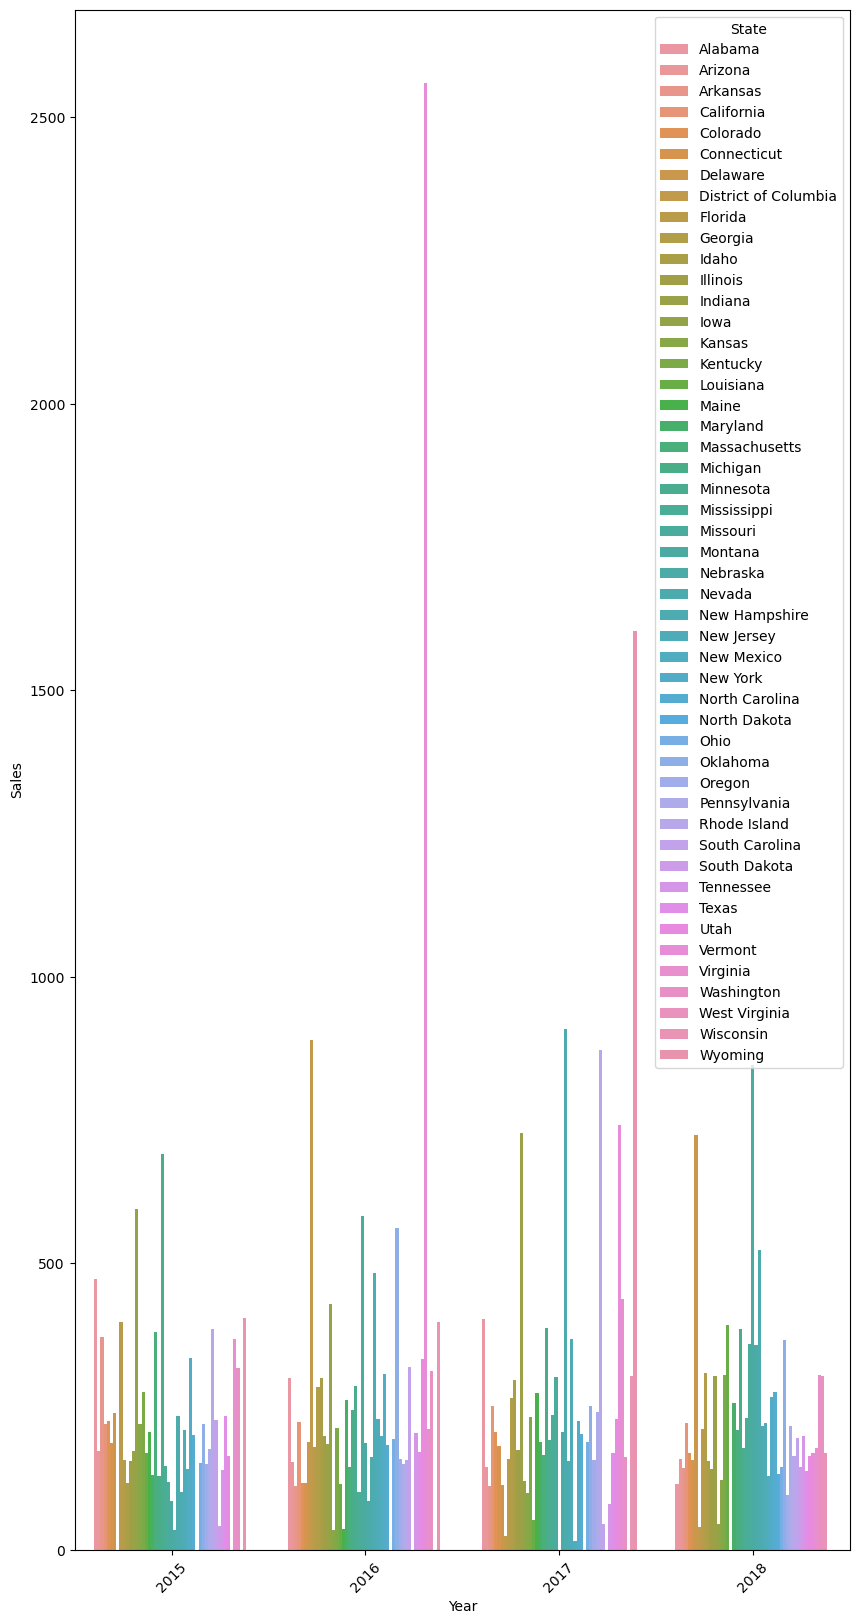

In [45]:
# Plotting average sales per region and year of order date
import seaborn as sns
import matplotlib.pyplot as plt  # Added missing import

%matplotlib inline

# Calculate mean of all numeric columns in the aggregated dataframe and reset index to make it a regular dataframe
meanAGG = superstoreDataAGGStateYearly.mean(numeric_only = True).reset_index()

# Create a figure and axes with specified dimensions (10x20 inches)
fig, ax = plt.subplots(figsize=(10, 20)) 

# Create a bar plot showing Sales by Year, with different colors for each State
g = sns.barplot(data=meanAGG, x='Year', y='Sales', hue='State')

# Get the unique years from the data to use as x-tick labels
# This ensures the number of labels matches the number of tick positions
unique_years = meanAGG['Year'].unique()
g.set_xticklabels(unique_years)

# Optional: Rotate labels if needed for better readability
plt.xticks(rotation=45)

In [46]:
# Filter the meanAGG dataframe to include only rows where State is either "Alabama" or "North Carolina"
# This creates a new dataframe called meanAGGNCAL containing data for just these two states
meanAGGNCAL = meanAGG[(meanAGG.State=="Alabama")|(meanAGG.State=="North Carolina")]
# Display the filtered dataframe
meanAGGNCAL

,State,Year,Row ID,Postal Code,Sales,Quantity,Discount,Profit,EmployeeID
0,Alabama,2015,3465.461538,35843.615385,472.237692,4.615385,0.000000,96.210185,5.846154
1,Alabama,2016,5205.923077,36157.384615,299.382308,4.538462,0.000000,92.291185,4.769231
2,Alabama,2017,2668.789474,36265.789474,402.701579,4.210526,0.000000,149.470021,5.263158
3,Alabama,2018,5027.562500,35662.875000,114.265625,3.562500,0.000000,31.023569,4.375000
121,North Carolina,2015,3867.813953,28108.348837,200.482349,3.906977,0.265116,-32.909281,4.744186
122,North Carolina,2016,6769.127660,28156.702128,182.091447,4.042553,0.300000,-26.555762,4.914894
123,North Carolina,2017,4646.175676,28050.486486,202.260757,3.918919,0.282432,3.524880,4.418919
124,North Carolina,2018,4598.764706,28077.929412,275.962694,3.941176,0.284706,-59.865099,4.929412


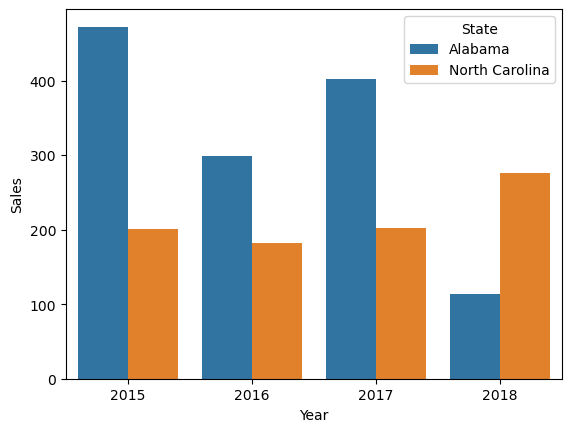

In [47]:
# Plotting average sales per year in Alabama and North Carolina
import seaborn as sns

%matplotlib inline

meanAGG = superstoreDataAGGStateYearly.mean(numeric_only = True).reset_index()

meanAGGNCAL = meanAGG[(meanAGG.State=="Alabama")|(meanAGG.State=="North Carolina")]


#g = sns.barplot(x=meanAGG['Order Date'],  y=meanAGG['Sales'],  hue=meanAGG['State']) #catplot, lineplot
g = sns.barplot(data=meanAGGNCAL, x='Year',  y='Sales',  hue='State') #catplot, lineplot

#g.set_xticklabels(meanAGGNCAL['Year'].values)

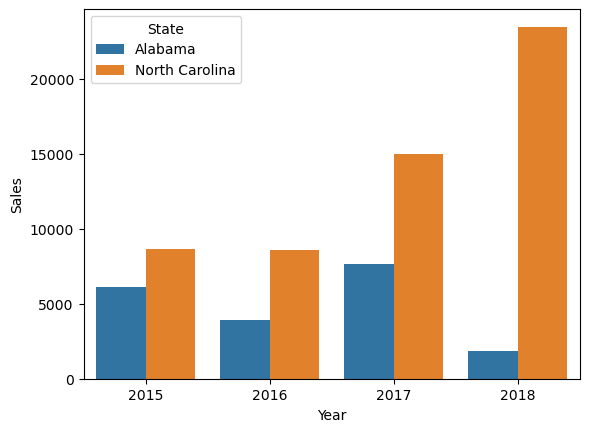

In [48]:
# Plotting total sales per year in Alabama and North Carolina
import seaborn as sns

%matplotlib inline

sumAGG = superstoreDataAGGStateYearly.sum(numeric_only = True).reset_index()

sumAGGNCAL = sumAGG[(sumAGG.State=="Alabama")|(sumAGG.State=="North Carolina")]


g = sns.barplot(data=sumAGGNCAL, x='Year',  y='Sales',  hue='State') #catplot, lineplot

#g.set_xticklabels(sumAGGNCAL['Year'].values)

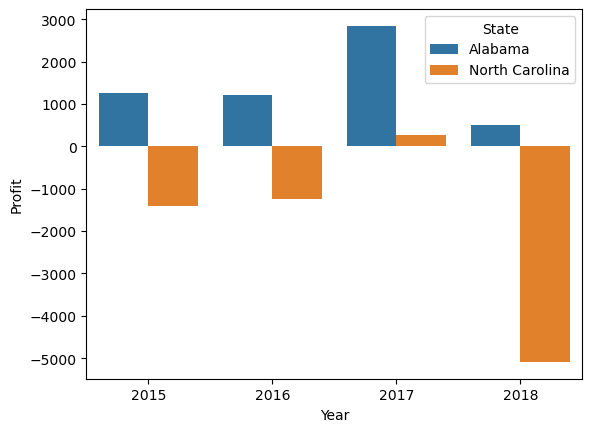

In [49]:
# Plotting total profit per year in Alabama and North Carolina

import seaborn as sns

%matplotlib inline

sumAGG = superstoreDataAGGStateYearly.sum(numeric_only = True).reset_index()

sumAGGNCAL = sumAGG[(sumAGG.State=="Alabama")|(sumAGG.State=="North Carolina")]


g = sns.barplot(data=sumAGGNCAL, x='Year',  y='Profit',  hue='State') #catplot, lineplot

#g.set_xticklabels(sumAGGNCAL['Year'].values)